In [13]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
code = os.path.abspath("../code")
sys.path.append(code)
import slime
import importlib

import time

slime = importlib.reload(slime)

# Decay vs. coverage %
decay = [0.01, 0.025, 0.05, 0.075, 0.1, 0.25]
pop = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]


width = 100

plot = np.empty((len(decay)*width, len(pop)*width))
x = 0
y = 0
for d in decay:
    for p in pop:
        start = time.time()

        sm = slime.Mould(width, decay=d, coverage=p)
        sm.evolve(200)
        cy = y*width
        cx = x*width
        plot[cy:cy+width, cx:cx+width] = sm.pheromones()
        x += 1

        end = time.time()

        print(f"Done decay {d} with pop% {p} in {end-start} seconds")
    x = 0
    y += 1


Done decay 0.01 with pop% 0.05 in 22.425364017486572 seconds
Done decay 0.01 with pop% 0.1 in 23.798008680343628 seconds
Done decay 0.01 with pop% 0.2 in 34.032989263534546 seconds
Done decay 0.01 with pop% 0.3 in 37.95316505432129 seconds
Done decay 0.01 with pop% 0.4 in 44.44561791419983 seconds
Done decay 0.01 with pop% 0.5 in 48.579110860824585 seconds
Done decay 0.01 with pop% 0.6 in 50.53467011451721 seconds
Done decay 0.025 with pop% 0.05 in 20.194812774658203 seconds
Done decay 0.025 with pop% 0.1 in 25.240135192871094 seconds
Done decay 0.025 with pop% 0.2 in 28.933310985565186 seconds
Done decay 0.025 with pop% 0.3 in 36.48197293281555 seconds
Done decay 0.025 with pop% 0.4 in 41.98938226699829 seconds
Done decay 0.025 with pop% 0.5 in 45.25709509849548 seconds
Done decay 0.025 with pop% 0.6 in 47.74129104614258 seconds
Done decay 0.05 with pop% 0.05 in 19.796441078186035 seconds
Done decay 0.05 with pop% 0.1 in 21.378009796142578 seconds
Done decay 0.05 with pop% 0.2 in 40.2

In [14]:
x=0
y=0
pl = np.empty_like(plot)
for d in decay:
    for p in pop:
        cy = y*width
        cx = x*width
        pl[cy:cy+width, cx:cx+width] = plot[cy:cy+width, cx:cx+width]/np.max(plot[cy:cy+width, cx:cx+width])
        x += 1
    x = 0
    y += 1

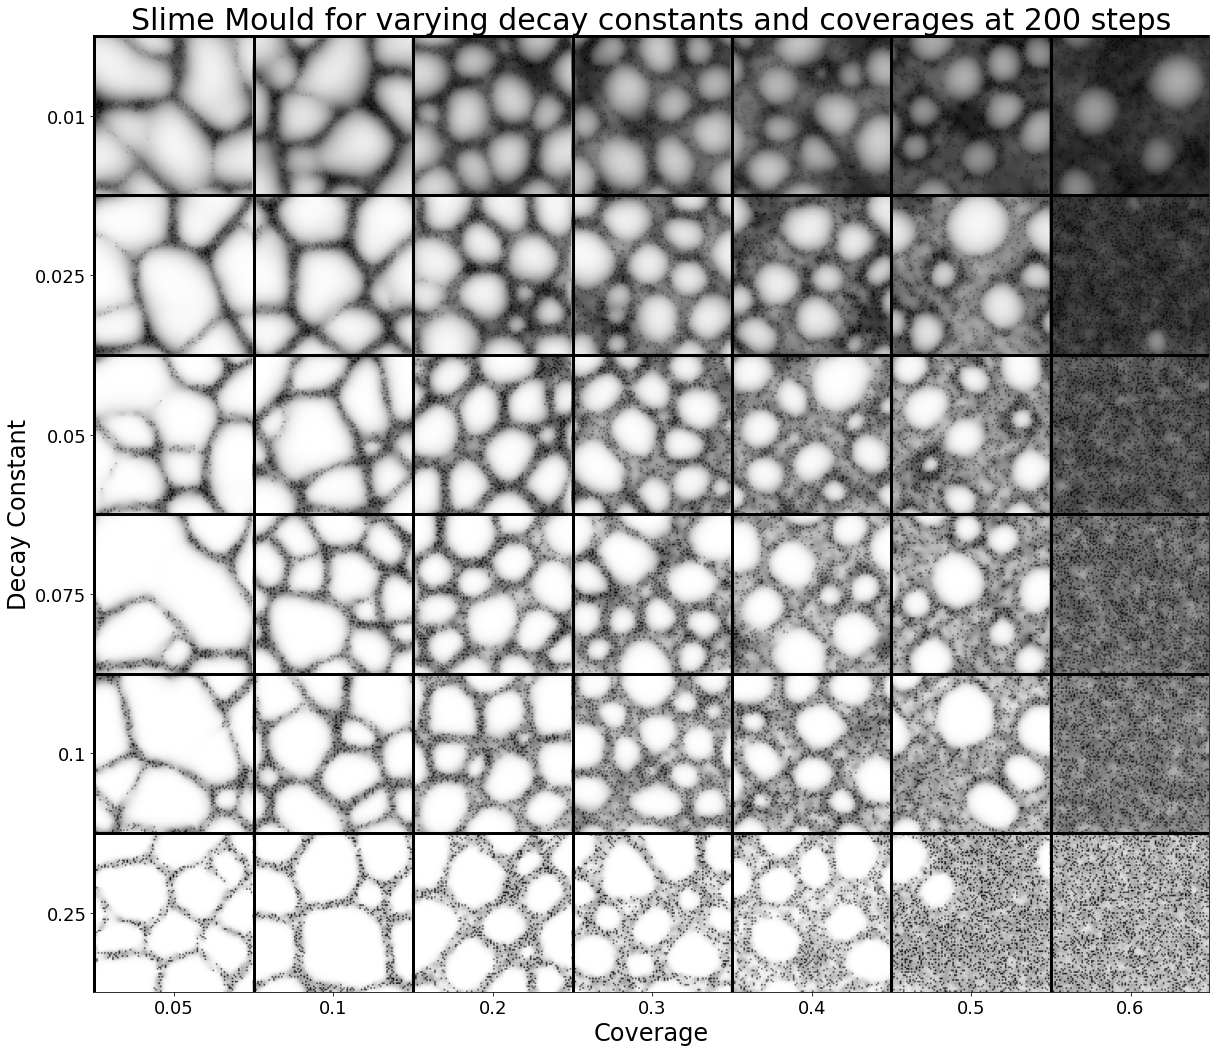

In [15]:
fig, ax = plt.subplots(figsize=(20,27))
plt.imshow(pl, cmap='gray_r')
ax.set_xticks(np.linspace(0, (len(pop)-1)*width, len(pop))+width/2)
ax.set_yticks(np.linspace(0, (len(decay)-1)*width, len(decay))+width/2)
ax.set_xticklabels(pop, fontsize=18)
ax.set_yticklabels(decay,  fontsize=18)
ax.set_xlabel('Coverage', fontsize=24)
ax.set_ylabel('Decay Constant', fontsize=24)
ax.set_title('Slime Mould for varying decay constants and coverages at 200 steps', fontsize=30)
for i in range(len(pop)):
    plt.axvline(x=i*width, color='black', linewidth=3)

for i in range(len(decay)):
    plt.axhline(y=i*width, color='black', linewidth=3)

plt.gca().set_aspect(1)
ax.grid(linewidth=1, which='minor')
plt.show()